<a href="https://colab.research.google.com/github/imshiv-10/ML-SkLearn/blob/main/5%20-%20Gradient%20Boosting%20with%20XGBoost/Gradient_Boosting(GBMs)_with_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boosting with XGBoost

Gradient Boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. XGBoost is an implementation of gradient boosting that is designed for speed and performance. It stands for Extreme Gradient Boosting and it's an optimized version of gradient boosting algorithm which is highly efficient and scalable. XGBoost uses parallel processing, regularization, and early stopping to prevent overfitting, which often results in higher accuracy and faster training times compared to other gradient boosting libraries.


+ Downloading a real-world dataset from a Kaggle competition
+ Performing feature engineering and prepare the dataset for training
+ Training and interpreting a gradient boosting model using XGBoost
+ Training with KFold cross validation and ensembling results
+ Configuring the gradient boosting model and tuning hyperparamters

In [ ]:
# Lets importing the required packages here 
# for preparing intial stage required packages are here...
import numpy as np # loading the numpy module for performing the numerical operations on data
import pandas as pd # loading pandas module to manage and pre-processing the data
import matplotlib # loading the matplotlib module for visual perpose
import matplotlib.pyplot as plt # ``
import seaborn as sns # ``
import sklearn # loading scikit-learn module for statistical pre-processing the data
import xgboost # loading xgbm module for solving the future predictions on top of existing models at Xtreme level
import lightgbm 
!pip install opendatasets --upgrade --quiet
import opendatasets as od

# Problem Statement

Thegradient boosting by applying it to a real-world dataset from the [Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales) competition on Kaggle:


+ **Description**

  Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

+ **Evalution**

  Submissions are evaluated on the Root Mean Square Percentage Error (RMSPE). The RMSPE is calculated as

In [ ]:
data_url = "https://www.kaggle.com/competitions/rossmann-store-sales/overview"
od.download(data_url, "./Kaggle/")
# Before download point to kaggle we need to accept the Rules in kaggle project section

Skipping, found downloaded files in "./Kaggle/rossmann-store-sales" (use force=True to force download)


In [ ]:
pd.options.display.max_columns =200
pd.options.display.max_rows = 200

In [ ]:
store_df = pd.read_csv("./Kaggle/rossmann-store-sales/store.csv")
test_df = pd.read_csv("./Kaggle/rossmann-store-sales/test.csv")
train_df = pd.read_csv("./Kaggle/rossmann-store-sales/train.csv", low_memory=False)
submissions_df = pd.read_csv("./Kaggle/rossmann-store-sales/sample_submission.csv")

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
submissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [ ]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


Let's merge the information from store_df into train_df and test_df.

- In pandas columns names are case-sensitive to access in dataframe

In [ ]:
merged_df = train_df.merge(store_df, how="left" , on="Store")
merged_test_df = test_df.merge(store_df, how="left" , on="Store")

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(20,10)
matplotlib.rcParams['figure.facecolor'] = "#00000000"
matplotlib.rcParams['font.size']=14
sns.set_style("darkgrid")

<ipython-input-213-63de17e54b9b>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(merged_df.corr(), dtype = np.bool)


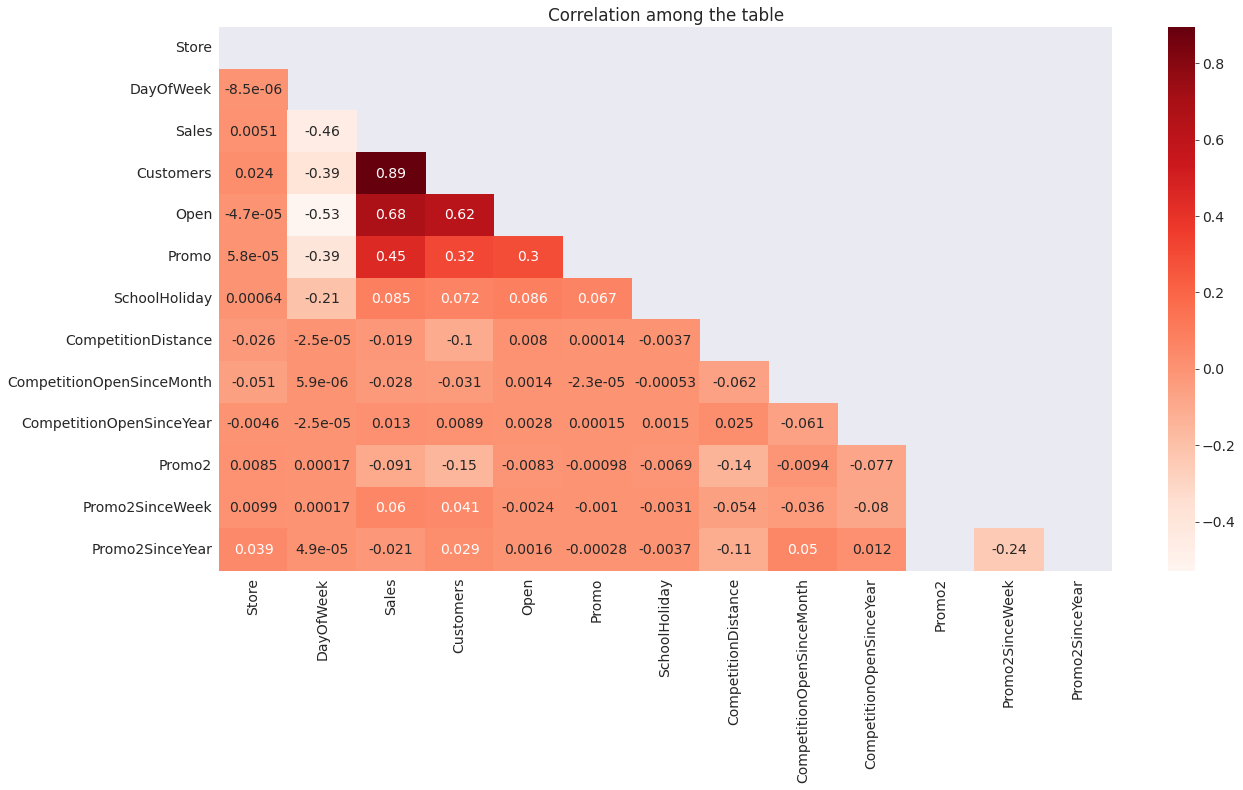

In [ ]:
fig, ax =  plt.subplots()
ax.set_title("Correlation among the table")

# Generate a mask for the upper triangle
mask = np.zeros_like(merged_df.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=merged_df.corr(), cmap="Reds", annot=True, mask = mask);

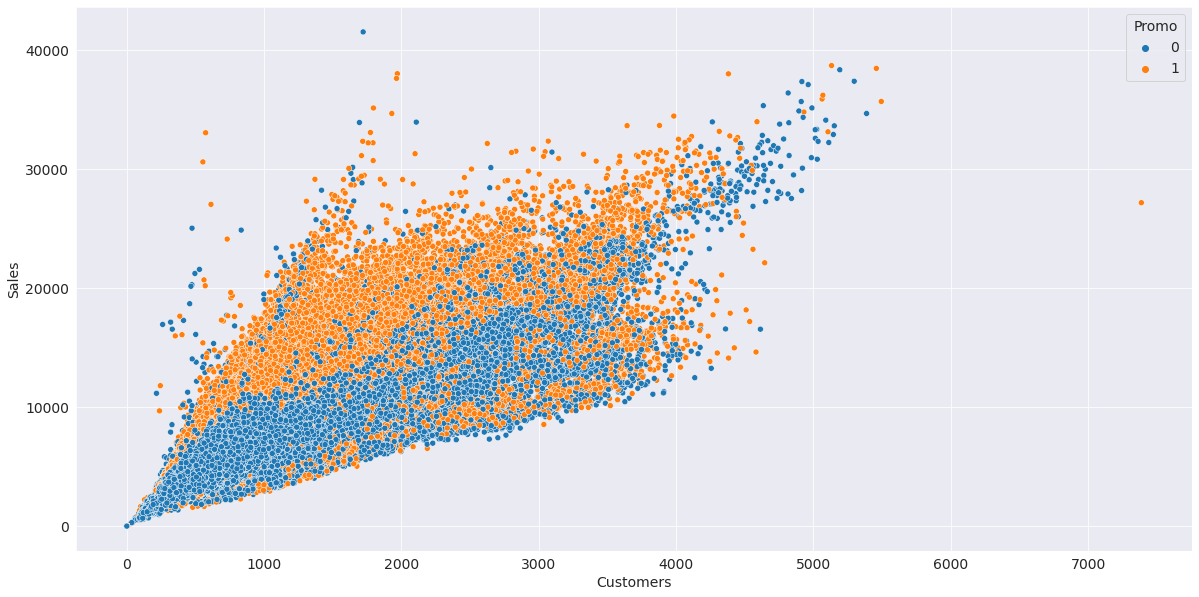

In [ ]:
sns.scatterplot(data=merged_df, x="Customers", y="Sales", hue="Promo");

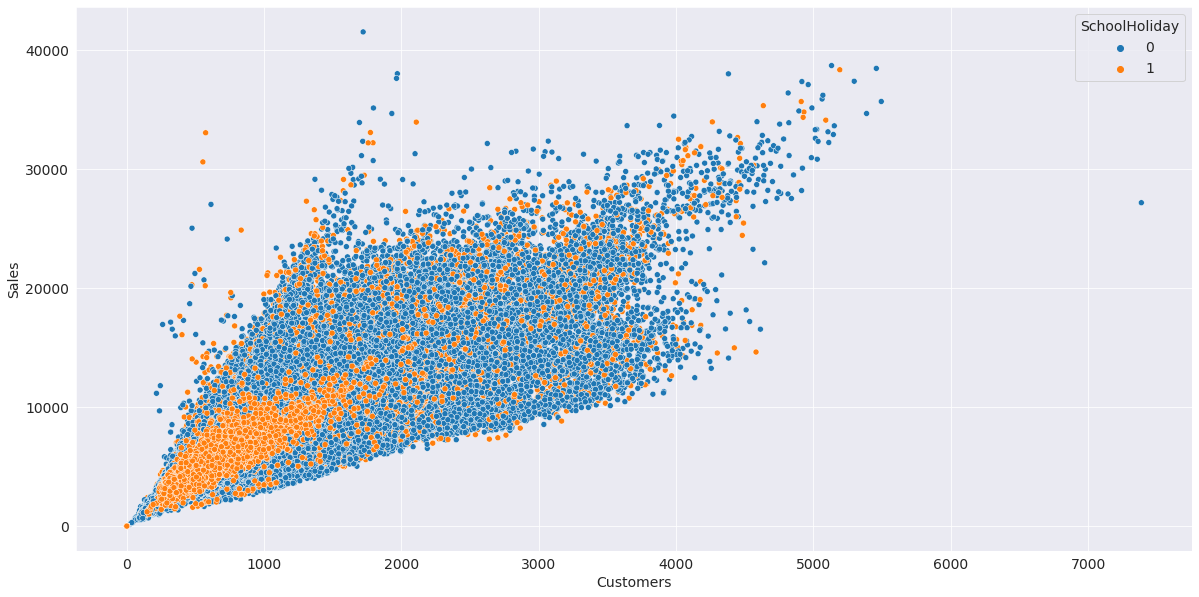

In [ ]:
sns.scatterplot(data=merged_df, x="Customers", y="Sales", hue="SchoolHoliday");

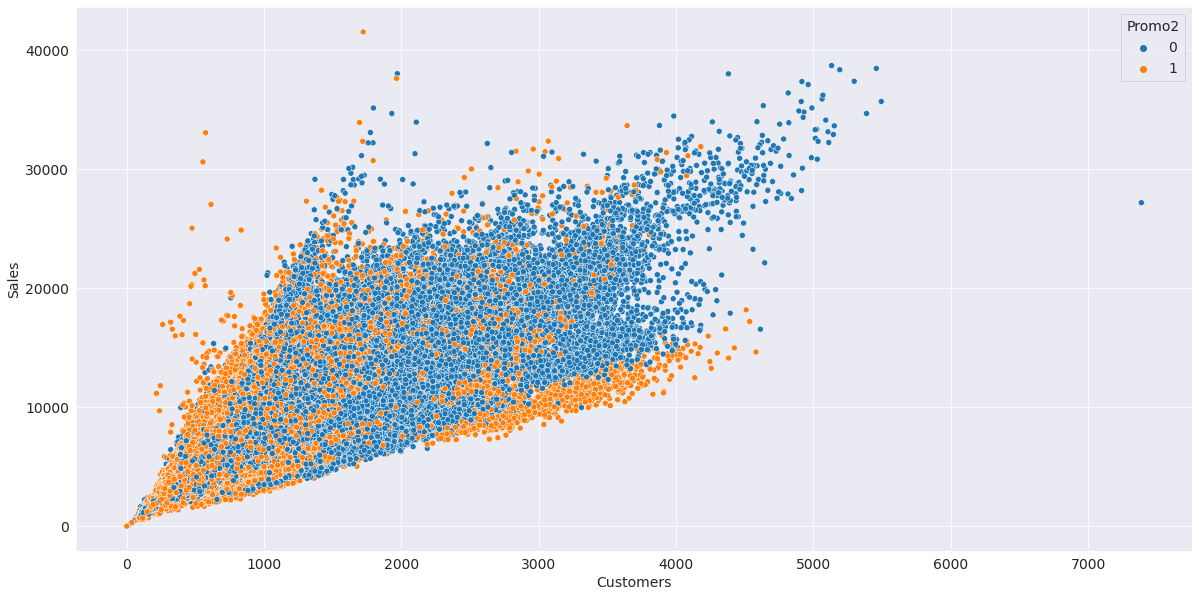

In [ ]:
sns.scatterplot(data=merged_df, x="Customers", y="Sales", hue="Promo2");

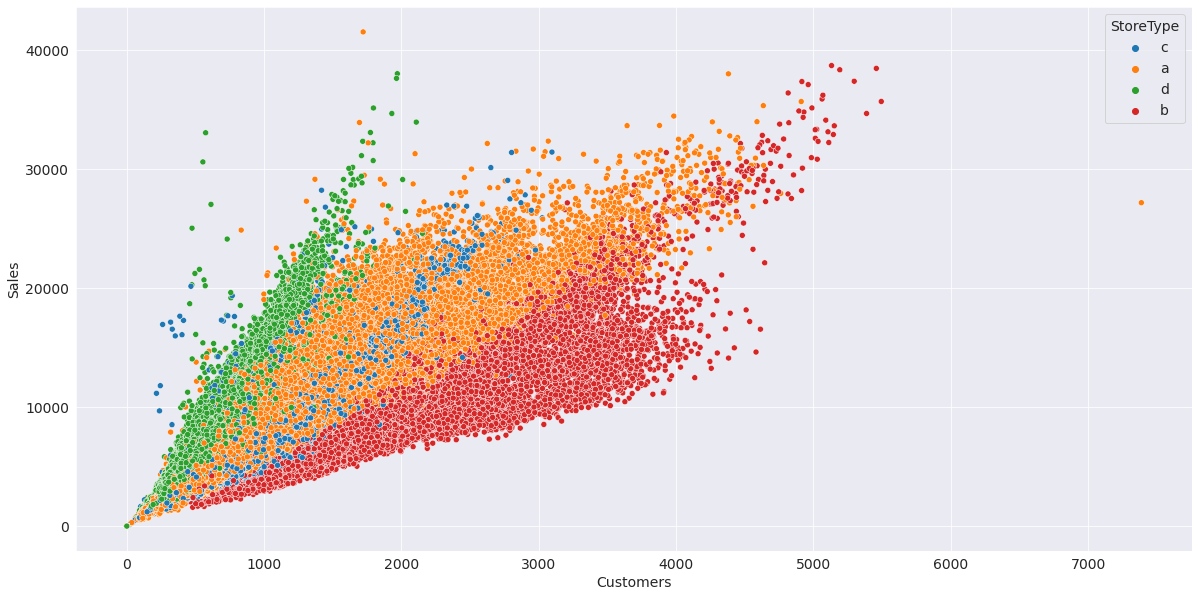

In [ ]:
sns.scatterplot(data=merged_df, x="Customers", y="Sales", hue="StoreType");

In [ ]:
merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [ ]:
store_df.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
cdf = ECDF(train_df['Sales'])

In [ ]:
cdf.x

array([  -inf,     0.,     0., ..., 38484., 38722., 41551.])

In [ ]:
cdf.y

array([0.00000000e+00, 9.83082139e-07, 1.96616428e-06, ...,
       9.99998034e-01, 9.99999017e-01, 1.00000000e+00])

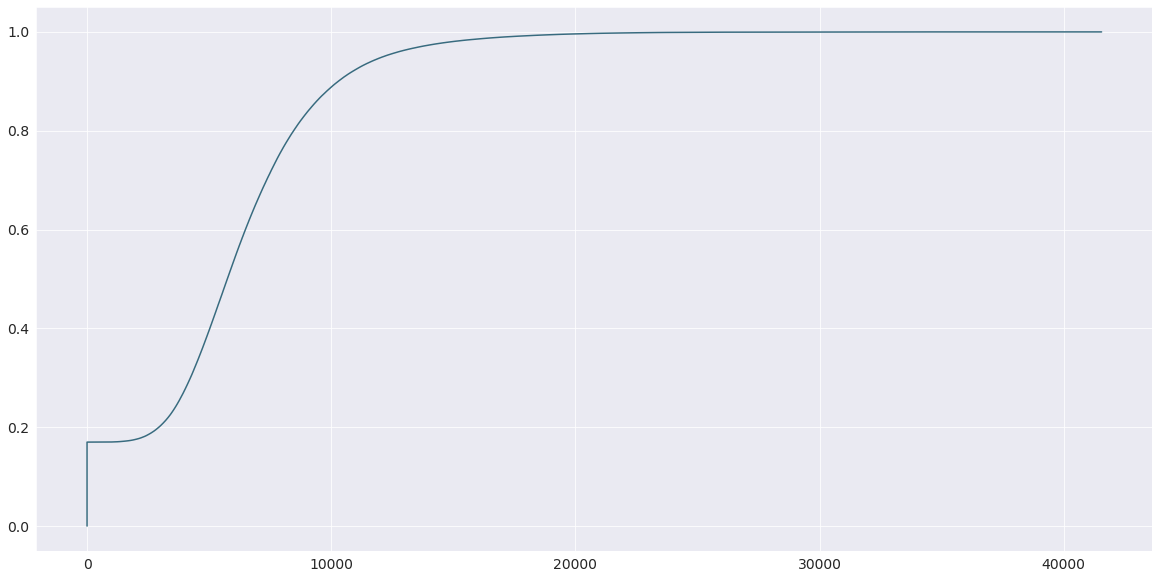

In [ ]:
c = '#386B7F' # basic color for plots
plt.plot(cdf.x,cdf.y, color = c)

In [ ]:
merged_df.info()

In [ ]:
def split_Dates(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
split_Dates(merged_df), split_Dates(merged_test_df)

(None, None)

In [ ]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0


In [ ]:
merged_df[merged_df['Open']  == 0].Sales.value_counts()

Series([], Name: Sales, dtype: int64)

In [ ]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [ ]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0


In [ ]:
def comp_months(df):
  df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month -df.CompetitionOpenSinceMonth)
  df['CompetitionOpen']  = df['CompetitionOpen'].map(lambda x: 0 if x<0 else x).fillna(0)

In [ ]:
comp_months(merged_df)

In [ ]:
comp_months(merged_test_df)

In [ ]:
merged_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17,38,84.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17,38,29.0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17,38,11.0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17,38,181.0


In [ ]:
merged_df[['Date','CompetitionDistance','CompetitionOpenSinceYear','CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
851633,2013-05-29,3910.0,2006.0,11.0,78.0
9040,2015-07-23,3570.0,2009.0,11.0,68.0
197326,2015-02-05,2210.0,2011.0,11.0,39.0
498856,2014-04-10,58260.0,2013.0,4.0,12.0
473734,2014-05-03,90.0,NaN,NaN,0.0
22689,2015-07-11,1600.0,2009.0,4.0,75.0
508946,2014-04-01,1250.0,2004.0,2.0,122.0
223675,2015-01-12,1410.0,2008.0,9.0,76.0
218776,2015-01-16,1420.0,2007.0,11.0,86.0
598871,2014-01-11,310.0,2015.0,5.0,0.0


In [ ]:
merged_df['Promo2Open'] = 12 * (merged_df.Year - merged_df.Promo2SinceYear) + (merged_df.WeekOfYear - merged_df.Promo2SinceWeek)*7/30.5

In [ ]:
merged_df['Promo2Open'] = merged_df['Promo2Open'].map(lambda x: 0 if x< 0 else x).fillna(0)* merged_df['Promo2']

In [ ]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000


In [ ]:
merged_df['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
%%time
i = merged_df.loc[:,'PromoInterval'][1] 
j = merged_df.loc[:,'Promo2Open'][1]
k = merged_df.loc[:,'Month'][1]
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
months = (i or '').split(',')
try:
    if j and month2str[k] in months:
        print(1)
    else:
        print(0)
except Exception:
    print(0)

1
CPU times: user 32.9 ms, sys: 0 ns, total: 32.9 ms
Wall time: 44.6 ms


In [ ]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        #given input row the promointerval column is indexed and split by "," 
        months = (row['PromoInterval'] or '').split(',')
        #print(months)
        #if the row indexed promo2open column and the row month are in months you return 1
        if row['Promo2Open'] and month2str[row['Month']] in months:
            print(month2str[row['Month']])
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df.loc[:,'Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df.loc[:,'Promo2Open'] = df.loc[:,'Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    #df.loc[:,'IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [ ]:
merged_df['IsPromo2Month'] = merged_df.apply(check_promo_month, axis=1) * merged_df['Promo2'];

In [ ]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0


In [ ]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
45728,2015-06-20,1,2011.0,40.0,"Jan,Apr,Jul,Oct",44.557377,0
627127,2013-12-16,0,NaN,NaN,NaN,0.000000,0
125915,2015-04-10,1,2013.0,36.0,"Jan,Apr,Jul,Oct",19.180328,1
926542,2013-03-23,0,NaN,NaN,NaN,0.000000,0
799727,2013-07-15,1,2010.0,35.0,"Mar,Jun,Sept,Dec",34.622951,0
237596,2014-12-30,1,2013.0,10.0,"Mar,Jun,Sept,Dec",9.934426,1
607894,2014-01-03,0,NaN,NaN,NaN,0.000000,0
297688,2014-10-27,0,NaN,NaN,NaN,0.000000,0
853473,2013-05-27,1,2014.0,18.0,"Feb,May,Aug,Nov",0.000000,0
546673,2014-02-27,1,2012.0,22.0,"Jan,Apr,Jul,Oct",21.016393,0


In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [ ]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [ ]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [ ]:
inputs.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.131148,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.901639,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.000000,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.000000,0


In [ ]:
targets.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [ ]:
test_inputs = merged_test_df[input_cols]

KeyError: ignored

In [ ]:
merged_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17,38,84.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17,38,29.0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17,38,11.0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17,38,181.0


In [ ]:
merged_test_df['Promo2Open'] = 12 * (merged_test_df.Year - merged_test_df.Promo2SinceYear) + (merged_test_df.WeekOfYear -  merged_test_df.Promo2SinceWeek) *7/30.5
merged_test_df['Promo2Open'] = merged_test_df['Promo2Open'].map(lambda x: 0 if x< 0 else x).fillna(0) * merged_test_df['Promo2']

In [ ]:
promo_cols(merged_test_df)

In [ ]:
merged_test_df.IsPromo2Month.value_counts()

0    35852
1     5236
Name: IsPromo2Month, dtype: int64

In [ ]:
test_input = merged_test_df[input_cols].copy()

In [ ]:
test_input.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,4,1,0,0,c,a,1270.0,84.0,17,9,2015,38,0,0.000000,0
1,3,4,1,0,0,a,a,14130.0,105.0,17,9,2015,38,1,53.508197,0
2,7,4,1,0,0,a,c,24000.0,29.0,17,9,2015,38,0,0.000000,0
3,8,4,1,0,0,a,a,7520.0,11.0,17,9,2015,38,0,0.000000,0
4,9,4,1,0,0,a,c,2030.0,181.0,17,9,2015,38,0,0.000000,0


In [ ]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   DayOfWeek            844392 non-null  int64  
 2   Promo                844392 non-null  int64  
 3   StateHoliday         844392 non-null  object 
 4   SchoolHoliday        844392 non-null  int64  
 5   StoreType            844392 non-null  object 
 6   Assortment           844392 non-null  object 
 7   CompetitionDistance  842206 non-null  float64
 8   CompetitionOpen      844392 non-null  float64
 9   Day                  844392 non-null  int64  
 10  Month                844392 non-null  int64  
 11  Year                 844392 non-null  int64  
 12  WeekOfYear           844392 non-null  UInt32 
 13  Promo2               844392 non-null  int64  
 14  Promo2Open           844392 non-null  float64
 15  IsPromo2Month   

In [ ]:
numeric_cols =inputs.select_dtypes(include=['int64','UInt32','float64']).columns.tolist()
cat_cols = inputs.select_dtypes(include=['object']).columns.tolist()

In [ ]:
numeric_cols.remove('DayOfWeek')

In [ ]:
numeric_cols

['Store',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpen',
 'Day',
 'Month',
 'Year',
 'WeekOfYear',
 'Promo2',
 'Promo2Open',
 'IsPromo2Month']

In [ ]:
cat_cols.append('DayOfWeek')

In [ ]:
cat_cols

['StateHoliday', 'StoreType', 'Assortment', 'DayOfWeek']

In [ ]:
inputs[numeric_cols].isnull().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
dtype: int64

In [ ]:
inputs[cat_cols].isnull().sum()

StateHoliday    0
StoreType       0
Assortment      0
DayOfWeek       0
dtype: int64

In [ ]:
test_input[numeric_cols].isnull().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
imputer.fit(merged_df[numeric_cols])

SimpleImputer(strategy='median')

In [ ]:
inputs[numeric_cols] = imputer.transform(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
dtype: int64

In [ ]:
test_input[numeric_cols] =  imputer.transform(test_input[numeric_cols])

In [ ]:
test_input.isna().sum()

Store                  0
DayOfWeek              0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
dtype: int64

In [ ]:
inputs[cat_cols].isna().sum()

StateHoliday    0
StoreType       0
Assortment      0
DayOfWeek       0
dtype: int64

# Numeric Scaling

Converting the all the numeric data to the range of 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(merged_df[numeric_cols])
inputs[numeric_cols] =  scaler.transform(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols]

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,0.000000,1.0,1.0,0.016482,0.059163,1.0,0.545455,1.0,0.588235,0.0,0.000000,0.0
1,0.000898,1.0,1.0,0.007252,0.066378,1.0,0.545455,1.0,0.588235,1.0,0.890710,1.0
2,0.001795,1.0,1.0,0.186050,0.074315,1.0,0.545455,1.0,0.588235,1.0,0.720856,1.0
3,0.002693,1.0,1.0,0.007911,0.050505,1.0,0.545455,1.0,0.588235,0.0,0.000000,0.0
4,0.003591,1.0,1.0,0.394119,0.002165,1.0,0.545455,1.0,0.588235,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,0.0,1.0,0.001714,0.054834,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1016827,0.657092,0.0,1.0,0.011076,0.114719,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1016863,0.689408,0.0,1.0,0.010812,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.016849,1.0
1017042,0.850090,0.0,1.0,0.018592,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [ ]:
test_input[numeric_cols] =  scaler.transform(test_input[numeric_cols])

# Categorical columns are transfored in to the numerical format range 0 to 1

+ using OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

In [ ]:
encoder.fit(merged_df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [343]:
encoder_cols = list(encoder.get_feature_names_out())
len(encoder_cols)

18

In [344]:
inputs[encoder_cols] =  encoder.transform(inputs[cat_cols])
test_input[encoder_cols] = encoder.transform(test_input[cat_cols])

In [352]:
inputs[numeric_cols + encoder_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
StateHoliday_0         0
StateHoliday_a         0
StateHoliday_b         0
StateHoliday_c         0
StoreType_a            0
StoreType_b            0
StoreType_c            0
StoreType_d            0
Assortment_a           0
Assortment_b           0
Assortment_c           0
DayOfWeek_1            0
DayOfWeek_2            0
DayOfWeek_3            0
DayOfWeek_4            0
DayOfWeek_5            0
DayOfWeek_6            0
DayOfWeek_7            0
dtype: int64

In [350]:
test_input[numeric_cols + encoder_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
StateHoliday_0         0
StateHoliday_a         0
StateHoliday_b         0
StateHoliday_c         0
StoreType_a            0
StoreType_b            0
StoreType_c            0
StoreType_d            0
Assortment_a           0
Assortment_b           0
Assortment_c           0
DayOfWeek_1            0
DayOfWeek_2            0
DayOfWeek_3            0
DayOfWeek_4            0
DayOfWeek_5            0
DayOfWeek_6            0
DayOfWeek_7            0
dtype: int64

In [353]:
!pip install jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [354]:
import jovian

In [355]:
jovian.commit(filename='XGBoosting' , git_commit=True , git_message="Xtreme_Gradient_Boosting_Technique")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
